![logo](../../LogoLine_horizon_C3S.png)

<div class="alert alert-block alert-warning">
Please note that this repository is used for development and review, so quality assessments should be considered work in progress until they are merged into the main branch
</div>

# In-situ Wind speed completeness for climate monitoring

Production date: 10/12/2025

Produced by: Beatriz Lopes and Ana Oliveira (CoLAB +ATLANTIC)

## 🌍 Use case: Assessment of Climate Change

## ❓ Quality assessment question
* **User Question: How consistent is the 30-year wind speed climatology over time?**

In this Use Case, we will access the E-OBS daily gridded meteorological data for Europe from 1981 to present derived from in-situ observations (henceforth, E-OBS) data from the Climate Data Store (CDS) of the Copernicus Climate change Service (C3S and analyse) the spatial consistency of the E-OBS wind speed (WS) climatology, and its emsemble, over agiven Area of Interest (AoI), as a regional example of using E-OBS in the scope of the European State of Climate [[1]](https://climate.copernicus.eu/esotc/2023). The analysis include:
- (i) the climatology and probability density function of each alternative 30-year period available (i.e., 1981-2010, 1991-2020); 
- (ii) the comparison with ERA5 reanalysis and one HadISD in-situ station.

## 📢 Quality assessment statement

```{admonition} These are the key outcomes of this assessment
:class: note
* Daily wind speed (WS) from E-OBS offers complete temporal-spatial coverage over the AoI, showing significative inter-annual variability and significant trends, consistent with findings reported in the literature  [[8]](https://doi.org/10.1002/joc.8191)[[9]](https://doi.org/10.5194/asr-20-91-2023).
* According to [[9]](https://doi.org/10.5194/asr-20-91-2023), E-OBS demonstrates better accuracy in capturing local wind patterns, with E-OBS showing good agreement in regions with dense station networks and a better depiction of wind stilling trends. 
* As is the case with the previous studies focusing on the other E-OBS variables [[4]](https://doi.org/10.1029/2017JD028200)[[5]](https://doi.org/10.1002/JOC.7269)[[6]](https://doi.org/10.1029/2009JD011799)[[7]](https://doi.org/10.1029/2020EA001633)[[8]](https://doi.org/10.1002/joc.8191)[[9]](https://doi.org/10.5194/asr-20-91-2023), this dataset tends to show a superior level of local detail, especially in regions with dense data.
* The findings thus support that E-OBS is a reliable source of climate data for local applications, especially in locations where geographic factors may lead to more localized wind patterns, and when focusing on depicting wind stilling or extremes. Furthermore, by offering a tuned ensemble spread, E-OBS helps users to determine the uncertainty of their added-value applications, providing an efficient way of catering for uncertainty of their results.  Indeed, as the density and location of all input stations are not fully available, the ensemble spread should be used as a complementary indicator of the confidence level and variability of WS.
```

![image.png](163c2967-26ce-41ab-92c3-abf780da4023.png)
```{note}
Figure A. Annual Mean Wind Speed Climatology: comparison between the 1981-2010 and 1991-2020 periods.
```

## 📋 Methodology
This notebook provides an assessment of the WS completeness for climate monitoring from **E-OBS daily gridded meteorological data for Europe from 1950 to present derived from in-situ observations dataset, [E-OBS](https://cds.climate.copernicus.eu/datasets/insitu-gridded-observations-europe?tab=overview). It achieves this by comparing the two 30-year climatological periods of 1981-2010 and 1991-2020. In particular, spatial patterns of annual and seasonal mean, along with ensemble spread, are examined and displayed for each period. This includes (i) the comparison of the full time series with ERA5 over the Area of Interest (AoI), and (ii) the comparison of both datasets with an in-situ station from the HadISD dataset.
The analysis and results follow the next outline:

**[](insitu_insitu-gridded-observations-europe_completeness_q05:code-section-1)**
- **[](insitu_insitu-gridded-observations-europe_completeness_q05:code-section-1.1)**
- **[](insitu_insitu-gridded-observations-europe_completeness_q05:code-section-1.2)**
- **[](insitu_insitu-gridded-observations-europe_completeness_q05:code-section-1.3)**
- **[](insitu_insitu-gridded-observations-europe_completeness_q05:code-section-1.4)**
- **[](insitu_insitu-gridded-observations-europe_completeness_q05:code-section-1.5)**
- **[](insitu_insitu-gridded-observations-europe_completeness_q05:code-section-1.6)**


**[](insitu_insitu-gridded-observations-europe_completeness_q05:code-section-2)**
- **[](insitu_insitu-gridded-observations-europe_completeness_q05:code-section-2.1)**
- **[](insitu_insitu-gridded-observations-europe_completeness_q05:code-section-2.2)**


**[](insitu_insitu-gridded-observations-europe_completeness_q05:code-section-3)**
- **[](insitu_insitu-gridded-observations-europe_completeness_q05:code-section-3.1)**
- **[](insitu_insitu-gridded-observations-europe_completeness_q05:code-section-3.2)**

**[](insitu_insitu-gridded-observations-europe_completeness_q05:code-section-4)**
- **[](insitu_insitu-gridded-observations-europe_completeness_q05:code-section-4.1)**
- **[](insitu_insitu-gridded-observations-europe_completeness_q05:code-section-4.2)**

**[](insitu_insitu-gridded-observations-europe_completeness_q05:code-section-5)**
- **[](insitu_insitu-gridded-observations-europe_completeness_q05:code-section-5.1)**
- **[](insitu_insitu-gridded-observations-europe_completeness_q05:code-section-5.2)**

**[](insitu_insitu-gridded-observations-europe_completeness_q05:code-section-6)**
- **[](insitu_insitu-gridded-observations-europe_completeness_q05:code-section-6.1)**
- **[](insitu_insitu-gridded-observations-europe_completeness_q05:code-section-6.2)**

**[](insitu_insitu-gridded-observations-europe_completeness_q05:code-section-7)**


## 📈 Analysis and results

(insitu_insitu-gridded-observations-europe_completeness_q05:code-section-1)=  
### 1. Define the AoI, search and download E-OBS

(insitu_insitu-gridded-observations-europe_completeness_q05:code-section-1.1)= 
#### 1.1. Import required packages
We will be working with data in NetCDF format. To best handle this data, we will utilise libraries for working with multidimensional arrays, specifically Xarray. We will also need libraries for plotting and viewing data, specifically, we will use Matplotlib and Cartopy.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
from c3s_eqc_automatic_quality_control import diagnostics, download, plot
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from scipy.stats import norm
import pooch

plt.style.use("seaborn-v0_8-notebook")

(insitu_insitu-gridded-observations-europe_completeness_q05:code-section-1.2)= 
#### 1.2. Data overview

To search for data, visit the CDS website: http://cds.climate.copernicus.eu Here you can search for 'in-situ observations' using the search bar. The data we need for this tutorial is the E-OBS daily gridded meteorological data for Europe from 1950 to present, derived from in-situ observations. This catalogue entry provides a daily gridded dataset of historical meteorological observations, covering Europe (land-only), from 1950 to the present. This data is derived from in-situ meteorological stations, made available through the European Climate Assessment & Dataset (ECA&D) project, as provided by National Meteorological and Hydrological Services (NMHSs) and other data-holding institutes. 
E-OBS comprises a set of spatially continuous Essential Climate Variables (ECVs) from the Surface Atmosphere, following the Global Climate Observing System (GCOS) convention, provided as the mean and spread of the spatial prediction ensemble algorithm, at regular latitude-longitude grid intervals (at a 0.1° and 0.25° spatial resolution), and covering a long time-period, from 1 January 1950 to present-day. In addition to the land surface elevation, E-OBS includes daily air temperature (mean, maximum and minimum), precipitation amount, wind speed, sea-level pressure and shortwave downwelling radiation. 
The E-OBS version used for this Use Case, E-OBSv31.0e, was released in October 2023 and its main difference from the previous E-OBSv30.0e is the inclusion of new series.
Having selected the correct dataset, we now need to specify what product type, variables, and temporal and geographic coverage we are interested in. In this Use Case, the ensemble mean of daily mean wind speed (FG) will be used, considering the last version available (31.0e). These can all be selected in the “Download data” tab from the CDS. In this tab, a form appears in which we will select the following parameters to download, for example:
- Product Type: Ensemble mean  
- Variable: daily mean wind speed
- Grid resolution: 0.25  
- Period: Full period  
- Version: 31.0e  
- Format: Zip file (.zip)
At the end of the download form, select `Show API request`. This will reveal a block of code, which you can simply copy and paste into a cell of your Jupyter Notebook …

(insitu_insitu-gridded-observations-europe_completeness_q05:code-section-1.3)= 
#### 1.3. Download and prepare E-OBS data

… having copied the API request to a Jupyter Notebook cell, running it will retrieve and download the data you requested into your local directory. However, before you run it, the `terms and conditions` of this particular dataset need to have been accepted directly at the CDS website. The option to view and accept these conditions is given at the end of the download form, just above the `Show API request` option. In addition, it is also useful to define the time period and AoI parameters and edit the request accordingly, as exemplified in the cells below. Furthermore, in this use case, the following 30-year climatological periods are considered, as per the guidelines from WMO [[3]](https://library.wmo.int/index.php?lvl=notice_display&id=20130):
- 1981 to 2010
- 1991 to 2020

In [2]:
# Define climatology periods - ToI
years_start = [1981, 1991]
years_stop = [2010, 2020]
colors = [ "gold", "red"]
assert len(years_start) == len(years_stop) == len(colors)

# Define region of interest - AoI 
area = [59, -11, 50, 2]  # N, W, S, E
assert len(area) == 4   

(insitu_insitu-gridded-observations-europe_completeness_q05:code-section-1.4)= 
#### 1.4. Define the required functions

To proceed with the analysis, it is useful to define some helper functions.
- The `dayofyear_reindex` function calculates the day of the year and adds it as an additional coordinate, along with the climatological `periods` established earlier
- The `spatial_weighted_mean` function extracts the spatial-weighted mean over the selected domains, accounting for the latitudinal dependence of the grid area and size which will be used for the analysis.
- The `make_statistics_dataframe` function converts the standard descriptive statistics of the spatial weighted mean results over the time dimension, considering the climatological periods chosen before
- The `compute_hist` function converts the data into histograms
- The `plot_pdf` function plots the data into Probability Density Functions (PDFs) format

In [3]:
# Define transform function to reduce downloaded data
def dayofyear_reindex(ds, years_start, years_stop):
    # 15-day rolling mean
    ds_rolled = ds.rolling(time=15, center=True).mean()

    # Extract periods
    datasets = []
    for year_start, year_stop in zip(years_start, years_stop):
        period = f"{year_start}-{year_stop}"
        ds_masked = ds_rolled.where(
            (ds_rolled["time"].dt.year >= year_start)
            & (ds_rolled["time"].dt.year <= year_stop),
            drop=True,
        )
        datasets.append(
            ds_masked.groupby("time.dayofyear").mean().expand_dims(period=[period])
        )
    ds_dayofyear = xr.merge(datasets)

    # Add season (pick any leap year)
    season = xr.DataArray(
        pd.to_datetime(ds_dayofyear["dayofyear"].values - 1, unit="D", origin="2008"),
    ).dt.season
    return ds_dayofyear.assign_coords(season=("dayofyear", season.values))

def spatial_weighted_mean(ds):
    ds = ds.resample(time="1D").mean(keep_attrs=True)
    return diagnostics.spatial_weighted_mean(ds)


# Statistics dataframe
def make_statistics_dataframe(da):
    dims = set(da.dims) - {"period"}
    return pd.DataFrame.from_dict(
        {
            "period": da["period"],
            "number": da.notnull().sum(dims),
            "mean": da.mean(dims),
            "maximum": da.max(dims),
            "minimum": da.min(dims),
            "st.deviation": da.std(dims),
        }
    )

# Histogram
def compute_hist(da, **kwargs):
    hist, bin_edges = np.histogram(da, **kwargs)
    da_hist = xr.DataArray(hist, coords={"bins": (bin_edges[1:] + bin_edges[:-1]) / 2})
    da_hist["bins"].attrs = da.attrs
    da_hist.attrs["long_name"] = "Probability Density"
    return da_hist

# Probability density function
def plot_pdf(da, colors, bins=None, **kwargs):
    if bins is None:
        bins = np.linspace(da.min().values, da.max().values, 50)

    dims = []
    for key in {"hue", "row", "col"} & set(kwargs):
        dims.append(kwargs[key])
    da = da.groupby(dims).map(compute_hist, bins=bins, density=True)
    with plt.rc_context(
        {
            "axes.prop_cycle": plt.cycler(color=colors),
            "axes.grid": True,
        }
    ):
        return da.plot(**kwargs)

Having defined the helper functions and download parameters, we will proceed with downloading the E-OBS dataset. We will also download the ERA5 reanalysis for comparison purposes.

In [4]:
# Define request
collection_id = "insitu-gridded-observations-europe"
request = {
    "variable": ["wind_speed"],
    "grid_resolution": "0_25deg",
    "period": "full_period",
    "version": ["31_0e"],
    "area": area,
}


collection_id_era5 = "reanalysis-era5-single-levels"

request_era5 = {
    "product_type": ["ensemble_mean"],
    "variable": ["10m_u_component_of_wind", "10m_v_component_of_wind"],
    "time": [f"{hour:02d}:00" for hour in range(0, 24, 3)],
    "area": area,
}

start = f"{min(years_start)}-01"
stop = f"{max(years_stop)}-12"
request_era5 = download.update_request_date(request_era5, start, stop)

In [5]:
# Periods
dataarrays = []
for reduction in ("mean", "spread"):
    print(f"{reduction=}")
    da = download.download_and_transform(
        collection_id,
        request | {"product_type": f"ensemble_{reduction}"},
        transform_func=dayofyear_reindex,
        transform_func_kwargs={"years_start": years_start, "years_stop": years_stop},
    )["fg"]
    dataarrays.append(da.rename(reduction))
    da.attrs["long_name"] += f" {reduction}"
ds_periods = xr.merge(dataarrays)

# Timeseries
da_eobs = download.download_and_transform(
    collection_id,
    request | {"product_type": "ensemble_mean"},
    transform_func=diagnostics.spatial_weighted_mean,
)["fg"]
da_eobs = da_eobs.sel(time=slice(start, stop))

reduction='mean'


  0%|          | 0/1 [00:00<?, ?it/s]2025-12-11 14:04:05,309 INFO [2025-12-03T00:00:00Z] To improve our C3S service, we need to hear from you! Please complete this very short [survey](https://confluence.ecmwf.int/x/E7uBEQ/). Thank you.
2025-12-11 14:04:05,485 INFO [2025-12-03T00:00:00Z] To improve our C3S service, we need to hear from you! Please complete this very short [survey](https://confluence.ecmwf.int/x/E7uBEQ/). Thank you.
2025-12-11 14:04:05,695 INFO Request ID is 15ef1fee-f7ef-45f0-99ca-3ee470dc1915
2025-12-11 14:04:05,931 INFO status has been updated to accepted
2025-12-11 14:04:19,517 INFO status has been updated to running
Recovering from connection error [('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))], attemps 1 of 500
Retrying in 120 seconds
2025-12-11 14:07:46,006 INFO status has been updated to successful
100%|██████████| 1/1 [05:49<00:00, 349.75s/it]


reduction='spread'


  0%|          | 0/1 [00:00<?, ?it/s]2025-12-11 14:09:54,905 INFO [2025-12-03T00:00:00Z] To improve our C3S service, we need to hear from you! Please complete this very short [survey](https://confluence.ecmwf.int/x/E7uBEQ/). Thank you.
2025-12-11 14:09:55,068 INFO [2025-12-03T00:00:00Z] To improve our C3S service, we need to hear from you! Please complete this very short [survey](https://confluence.ecmwf.int/x/E7uBEQ/). Thank you.
2025-12-11 14:09:55,244 INFO Request ID is 6048f0cb-81c0-40e5-b759-e30f110c0e3b
2025-12-11 14:09:55,303 INFO status has been updated to accepted
2025-12-11 14:10:08,861 INFO status has been updated to running
2025-12-11 14:10:27,959 INFO status has been updated to successful
100%|██████████| 1/1 [01:06<00:00, 66.66s/it]


In [6]:
# Inspect the E-OBS data structure
da_eobs

<xarray.DataArray 'fg' (time: 14610)> Size: 117kB
dask.array<getitem, shape=(14610,), dtype=float64, chunksize=(14610,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 117kB 1981-01-01 1981-01-02 ... 2020-12-31
Attributes:
    standard_name:  wind_speed
    long_name:      Ensemble mean wind speed
    units:          m/s

In [7]:
# Download and transform the ERA5 dataset
da_era5 = download.download_and_transform(
    collection_id_era5,
    request_era5,
    transform_func=diagnostics.spatial_weighted_mean,
    backend_kwargs={"time_dims": ["valid_time"]},
    chunks={"year": 1},
    n_jobs=2,
)[['u10', 'v10']]

2025-12-11 14:24:35,787 INFO [2025-12-03T00:00:00Z] To improve our C3S service, we need to hear from you! Please complete this very short [survey](https://confluence.ecmwf.int/x/E7uBEQ/). Thank you.
2025-12-11 14:24:35,798 INFO [2025-12-03T00:00:00Z] To improve our C3S service, we need to hear from you! Please complete this very short [survey](https://confluence.ecmwf.int/x/E7uBEQ/). Thank you.
2025-12-11 14:24:35,973 INFO [2025-12-03T00:00:00Z] To improve our C3S service, we need to hear from you! Please complete this very short [survey](https://confluence.ecmwf.int/x/E7uBEQ/). Thank you.
2025-12-11 14:24:35,973 INFO [2025-12-03T00:00:00Z] To improve our C3S service, we need to hear from you! Please complete this very short [survey](https://confluence.ecmwf.int/x/E7uBEQ/). Thank you.
2025-12-11 14:24:36,259 INFO Request ID is 559d0bde-4cc9-4389-949f-f556e7ce6810
2025-12-11 14:24:36,273 INFO Request ID is 63698810-6320-460f-af91-878320f937c2
2025-12-11 14:24:36,342 INFO status has been

In [8]:
# Compute wind speed from ERA5 u10 and v10
da_era5_wind_speed = np.sqrt(da_era5['u10']**2 + da_era5['v10']**2)

da_era5_wind_speed

<xarray.DataArray (time: 116880)> Size: 935kB
dask.array<sqrt, shape=(116880,), dtype=float64, chunksize=(2928,), chunktype=numpy.ndarray>
Coordinates:
  * time         (time) datetime64[ns] 935kB 1981-01-01 ... 2020-12-31T21:00:00
    realization  int64 8B 0
    surface      float64 8B 0.0

In [9]:
# Resample ERA5 to match the E-OBS daily temporal resolution
da_era5_wind_speed_mean = da_era5_wind_speed.resample(time="1D").mean(keep_attrs=True)

da_era5_wind_speed_mean

<xarray.DataArray (time: 14610)> Size: 117kB
dask.array<groupby_nanmean, shape=(14610,), dtype=float64, chunksize=(366,), chunktype=numpy.ndarray>
Coordinates:
  * time         (time) datetime64[ns] 117kB 1981-01-01 ... 2020-12-31
    realization  int64 8B 0
    surface      float64 8B 0.0

In [10]:
# Rename and subset the ERA5 wind speed
da_era5_wind_speed.name = "wind_speed"

da_era5_subset = da_era5_wind_speed.sel(
    time=slice('1980-01-01', '2020-12-31')).resample(time='1D').mean()

# Inspect the subset
da_era5_subset

<xarray.DataArray 'wind_speed' (time: 14610)> Size: 117kB
dask.array<groupby_nanmean, shape=(14610,), dtype=float64, chunksize=(366,), chunktype=numpy.ndarray>
Coordinates:
  * time         (time) datetime64[ns] 117kB 1981-01-01 ... 2020-12-31
    realization  int64 8B 0
    surface      float64 8B 0.0

In [11]:
# Subset the E-OBS wind speed
da_eobs_subset = da_eobs.sel(
    time=slice('1980-01-01', '2020-12-31')).resample(time='1D').mean()
    
# Inspect the subset
da_eobs_subset

<xarray.DataArray 'fg' (time: 14610)> Size: 117kB
dask.array<groupby_nanmean, shape=(14610,), dtype=float64, chunksize=(14610,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 117kB 1981-01-01 1981-01-02 ... 2020-12-31
Attributes:
    standard_name:  wind_speed
    long_name:      Ensemble mean wind speed
    units:          m/s

In [12]:
# Concatenate datasets along the "product" dimension
da_timeseries = xr.concat(
    [
        da_era5_subset.expand_dims(product=["ERA5"]),
        da_eobs_subset.expand_dims(product=["EOBS"]),
        
    ],
    "product",
)
# Inspect the resulting time series
da_timeseries

<xarray.DataArray 'wind_speed' (product: 2, time: 14610)> Size: 234kB
dask.array<concatenate, shape=(2, 14610), dtype=float64, chunksize=(1, 366), chunktype=numpy.ndarray>
Coordinates:
  * product      (product) object 16B 'ERA5' 'EOBS'
  * time         (time) datetime64[ns] 117kB 1981-01-01 ... 2020-12-31
    realization  int64 8B 0
    surface      float64 8B 0.0

(insitu_insitu-gridded-observations-europe_completeness_q05:code-section-1.5)= 
#### 1.5. Download in-situ data and EOBS timeseries for the station 035900-99999
To further assess the E-OBS WS consistency we are going add to the analysis the HadISD in-situ stations. 
HadISD is a global sub-daily dataset based in the National Oceanic and Atmospheric Admnistration (NOAA) ISD dataset. The variables present in the dataset are quality controlled for wind speed and direction, as well for temperature, dewpoint temperature, sea-level pressure and cloud data. The data are provided as netCDF files, one per station.
https://www.metoffice.gov.uk/hadobs/hadisd/
We are going to use the station 035900-99999.

In [13]:
url = "https://www.metoffice.gov.uk/hadobs/hadisd/v343_2025f/data/hadisd.3.4.3.2025f_19310101-20250829_035900-99999.nc.gz"
known_hash = "6b4abd0c69b240c651998255e00af0ebf277c4a1d2ae25e0eb26b0c815f4dfca"
filename = pooch.retrieve(url=url, known_hash=known_hash, processor=pooch.Decompress())
in_situ_data = xr.open_dataset(filename, chunks={})

# Extract lat/lon and station IDs
lat = in_situ_data.latitude
lon = in_situ_data.longitude

In [14]:
# Inspect the data
in_situ_data

<xarray.Dataset> Size: 411MB
Dimensions:                (time: 449803, test: 71, flagged: 19,
                            reporting_v: 19, reporting_t: 1140, reporting_2: 2,
                            coordinate_length: 1)
Coordinates:
  * time                   (time) datetime64[ns] 4MB 1973-01-01 ... 2025-08-2...
    longitude              (coordinate_length) float64 8B dask.array<chunksize=(1,), meta=np.ndarray>
    latitude               (coordinate_length) float64 8B dask.array<chunksize=(1,), meta=np.ndarray>
    elevation              (coordinate_length) float64 8B dask.array<chunksize=(1,), meta=np.ndarray>
Dimensions without coordinates: test, flagged, reporting_v, reporting_t,
                                reporting_2, coordinate_length
Data variables: (12/27)
    station_id             |S12 12B ...
    temperatures           (time) float64 4MB dask.array<chunksize=(449803,), meta=np.ndarray>
    dewpoints              (time) float64 4MB dask.array<chunksize=(449803,), meta=np.ndarray>
    slp                    (time) float64 4MB dask.array<chunksize=(449803,), meta=np.ndarray>
    stnlp                  (time) float64 4MB dask.array<chunksize=(449803,), meta=np.ndarray>
    windspeeds             (time) float64 4MB dask.array<chunksize=(449803,), meta=np.ndarray>
    ...                     ...
    wind_gust              (time) float64 4MB dask.array<chunksize=(449803,), meta=np.ndarray>
    past_sigwx1            (time) float64 4MB dask.array<chunksize=(449803,), meta=np.ndarray>
    input_station_id       (time) object 4MB dask.array<chunksize=(449803,), meta=np.ndarray>
    quality_control_flags  (time, test) float64 255MB dask.array<chunksize=(112451, 15), meta=np.ndarray>
    flagged_obs            (time, flagged) float64 68MB dask.array<chunksize=(149935, 7), meta=np.ndarray>
    reporting_stats        (reporting_v, reporting_t, reporting_2) float64 347kB dask.array<chunksize=(19, 1140, 2), meta=np.ndarray>
Attributes: (12/39)
    title:                       HadISD
    institution:                 Met Office Hadley Centre, Exeter, UK
    source:                      HadISD data product
    references:                  Dunn, 2019, Met Office Hadley Centre Technic...
    creator_name:                Robert Dunn
    creator_url:                 www.metoffice.gov.uk
    ...                          ...
    station_information:         Where station is a composite the station id ...
    Conventions:                 CF-1.6
    Metadata_Conventions:        Unidata Dataset Discovery v1.0, CF Discrete ...
    featureType:                 timeSeries
    processing_date:             01-Oct-2025
    history:                     Created by mk_netcdf_files.py \nDuplicate Mo...

Now we can plot the station 035900-99999 location in the AoI.

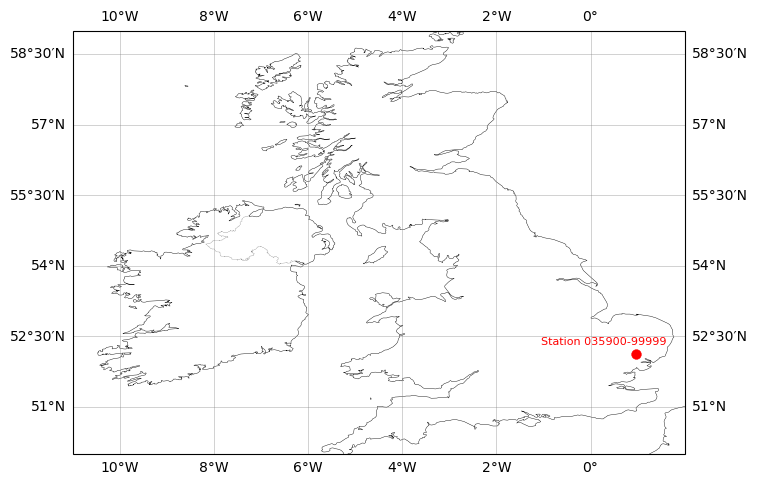

In [15]:
# Plot station cordinates on a map
fig = plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Add gridlines
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,
             linewidth=0.5, color='gray', alpha=0.5)

# Plot station markers
ax.scatter(lon, lat, color='red', s=50, marker='o', label='Station')

# Annotate each station
ax.text(lon-2, lat+0.2, 'Station 035900-99999',fontsize=8, color='red')

# Zoom to region of interest
ax.set_extent([2, -11, 50, 59])

plt.show()

We will download the WS data from both E-OBS and ERA5 for the pixel closest to the station 035900-99999. Since the station coordinates do not exactly match the E-OBS and ERA5 grid points, we will first select a small area around the station and then identify the nearest pixel within that area.

In [ ]:
start = f"{min(years_start)}-01"
stop = f"{max(years_stop)}-12"

# Define request
collection_id = "insitu-gridded-observations-europe"
request = {
    "variable": ["wind_speed"],
    "grid_resolution": "0_25deg",
    "period": "full_period",
    "version": ["31_0e"],
    "area": [lat+0.1, lon-0.1, lat-0.1, lon+0.1],
}

# Download EOBS data
da_eobs_at_station = download.download_and_transform(
    collection_id,
    request | {"product_type": "ensemble_mean"},
)["fg"]
da_eobs_at_station = da_eobs_at_station.sel(time=slice(start, stop))

collection_id_era5 = "reanalysis-era5-single-levels"

request_era5 = {
    "product_type": ["ensemble_mean"],
    "variable": ["10m_u_component_of_wind", "10m_v_component_of_wind"],
    "time": [f"{hour:02d}:00" for hour in range(0, 24, 3)],
    "area": [lat+0.2, lon-0.2, lat-0.2, lon+0.2],
}

request_era5 = download.update_request_date(request_era5, start, stop)
# Process the request
ds_ERA_5_at_station = download.download_and_transform(collection_id_era5, request_era5, chunks={"year": 1}, n_jobs=2)

# Calculate wind speed from u and v components
ds_ERA_5_at_station["windspeed"] = np.sqrt(ds_ERA_5_at_station["u10"] ** 2 + ds_ERA_5_at_station["v10"] ** 2)

# Calculate daily mean for ERA5
ds_ERA_5_at_station = ds_ERA_5_at_station.resample(forecast_reference_time="1D").mean()
# Rename time variables
ds_ERA_5_at_station = ds_ERA_5_at_station.rename({"forecast_reference_time": "time"})
ds_ERA_5_at_station = ds_ERA_5_at_station.mean(dim="leadtime")

100%|██████████| 40/40 [00:03<00:00, 10.28it/s]
/data/common/miniforge3/envs/wp5/lib/python3.12/site-packages/earthkit/data/utils/kwargs.py:59: UserWarning: In xarray_open_dataset_kwargs backend_kwargs, overriding the default value (squeeze=False) with squeeze=True is not recommended.
  warnings.warn(


In [17]:
# Extract E-OBS data at station 035900-99999
da_eobs_at_station = da_eobs_at_station.sel(latitude=lat, longitude=lon, method="nearest")

# Extract ERA5 data at station 035900-99999
da_era5_at_station = ds_ERA_5_at_station.sel(latitude=lat, longitude=lon, method="nearest")['windspeed']

da_in_situ = in_situ_data['windspeeds'].sel(time=slice(start, stop))

#Filter for minimum an maximum valid values
da_in_situ = da_in_situ.where((da_in_situ >=0) & (da_in_situ <= 31.4))
# Resample in-situ data to daily mean
da_in_situ = da_in_situ.resample(time="1D").mean(keep_attrs=True)

In [18]:
# Concatenate datasets along the "product" dimension
da_timeseries_at_station = xr.concat(
    [
        da_in_situ.expand_dims(product=["in-situ"]),
        da_eobs_at_station[:,0].expand_dims(product=["EOBS"]),
        da_era5_at_station[:,0].expand_dims(product=["ERA5"]),
    ],
    dim="product",
    compat="override",     # ignore small coord mismatches
    coords="minimal",      # keep only shared coordinates
)

In [19]:
# Inspect the dataset
da_timeseries_at_station

<xarray.DataArray 'windspeeds' (product: 3, time: 14610)> Size: 351kB
dask.array<concatenate, shape=(3, 14610), dtype=float64, chunksize=(1, 1), chunktype=numpy.ndarray>
Coordinates:
  * product      (product) object 24B 'in-situ' 'EOBS' 'ERA5'
  * time         (time) datetime64[ns] 117kB 1981-01-01 ... 2020-12-31
    longitude    float64 8B 0.975
    latitude     float64 8B 52.12
    elevation    float64 8B dask.array<chunksize=(), meta=np.ndarray>
    realization  int64 8B ...
    surface      float64 8B ...
Attributes:
    long_name:      Wind speed at mast height (~10m)
    units:          meters per second
    flagged_value:  -2e+30
    valid_min:      0.0
    valid_max:      31.4
    standard_name:  wind_speed
    cell_methods:   latitude: longitude: time: point (nearest to reporting hour)

(insitu_insitu-gridded-observations-europe_completeness_q05:code-section-1.6)= 
#### 1.6. Inspect and view the data
Now that we have downloaded the data, we can inspect it. We have requested the data in NetCDF format. This is a commonly used format for array-oriented scientific data. To read and process this data, we will make use of the Xarray library. Xarray is an open source project and Python package that makes working with labelled multi-dimensional arrays simple and efficient. We will read the data from our NetCDF file into an xarray.Dataset.

To better understand the E-OBS data structure and check the  aggregated Daily Mean WS, we will first need to retrieve the WS variable from the 2 multidimensional netCDF data structures and calculate the descriptive statistics.

In [20]:
# Print the xarray data structure
ds_periods

<xarray.Dataset> Size: 11MB
Dimensions:    (longitude: 52, latitude: 36, dayofyear: 366, period: 2)
Coordinates:
  * longitude  (longitude) float64 416B -10.77 -10.52 -10.27 ... 1.725 1.975
  * latitude   (latitude) float64 288B 50.12 50.38 50.62 ... 58.38 58.62 58.88
  * dayofyear  (dayofyear) int64 3kB 1 2 3 4 5 6 7 ... 361 362 363 364 365 366
  * period     (period) <U9 72B '1981-2010' '1991-2020'
    season     (dayofyear) <U3 4kB dask.array<chunksize=(366,), meta=np.ndarray>
Data variables:
    mean       (period, dayofyear, latitude, longitude) float32 5MB dask.array<chunksize=(2, 366, 36, 52), meta=np.ndarray>
    spread     (period, dayofyear, latitude, longitude) float32 5MB dask.array<chunksize=(2, 366, 36, 52), meta=np.ndarray>
Attributes:
    standard_name:  wind_speed
    long_name:      Ensemble mean wind speed mean
    units:          m/s

We can see from the data structure that our information is already stored in a four-dimensional array with two data variables, corresponding to the WS 'mean' and ensemble 'spread', with dimensions: 2 time periods in 'period', 366 days in 'dayofyear', 36 steps in 'latitude', and 52 steps in 'longitude'. This is because the toolbox provides an already post-processed output with the values calculated using the transformer function. In this use case, the following 30-years climatological periods are considered, as per the guidelines from WMO [[3]](https://library.wmo.int/index.php?lvl=notice_display&id=20130):

- 1981 to 2010
- 1991 to 2020

This reduces the amount of data to be processed and stored locally, facilitating the next steps. Let's inspect the data and compute the basic descriptive statistics of each period and print them in tabular form.

In [21]:
# Inspect WS statistics
make_statistics_dataframe(ds_periods["mean"])

,period,number,mean,maximum,minimum,st.deviation
0,1981-2010,219600,3.902579,10.733822,2.209356,0.688963
1,1991-2020,219600,3.949386,11.703578,1.882400,0.758773


In [22]:
# Inspect WS spread statistics
make_statistics_dataframe(ds_periods["spread"])

,period,number,mean,maximum,minimum,st.deviation
0,1981-2010,219600,3.989577,12.051609,0.798089,1.480452
1,1991-2020,219600,3.965940,13.503096,0.717911,1.543533


As we can see from the descriptive statistics, both climatology periods are characterised by similar mean WS. In the AoI, the mean annual WS between 1991 and 2020 is 3.95 m/s, less than -0.05 above the equivalent in 1981 to 2010, while the annual maximum increased less than 1 m/s and the minimum decreased less than 0.4 m/s. The WS spread decreased for the mean and minimum values by less than 0.08 m/s, although the maximum increased by approximately 1.5 m/s. To further explore these findings, let's compare E-OBS and ERA5 over the AoI.

To do this, we need to create a set of weights based on latitude values. The weighted method is used to create a weighted dataset. Any subsequent aggregation operations (such as mean, sum, etc.) will take these weights into account. These weights can be used to account for the varying area of grid cells in latitude-longitude grids to ensure that calculations properly account for varying areas represented by grid cells at different latitudes.

Now we will proceed with merging WS from both datasets.

In [23]:
era5 = da_timeseries.where(da_timeseries['product'] == 'ERA5', drop=True)
eobs = da_timeseries.where(da_timeseries['product'] == 'EOBS', drop=True)

print("ERA5 shape:", era5.shape)
print("EOBS shape:", eobs.shape)

ERA5 shape: (1, 14610)
EOBS shape: (1, 14610)


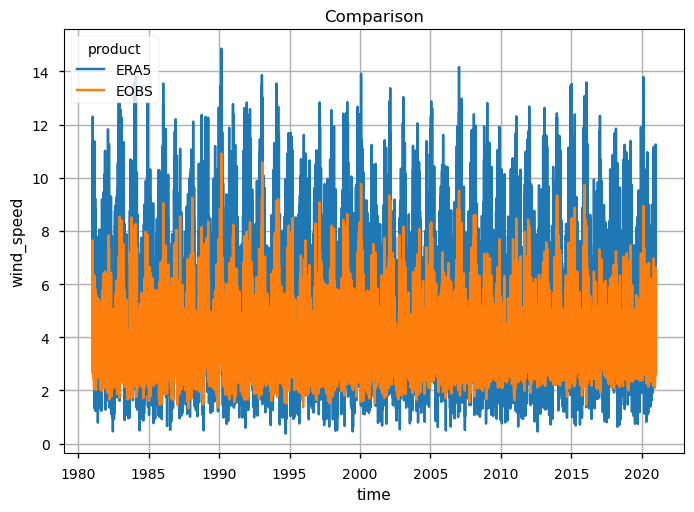

In [24]:
# Plot an overall comparison between both data products
da_timeseries.plot(hue="product")
plt.title("Comparison")
plt.grid()

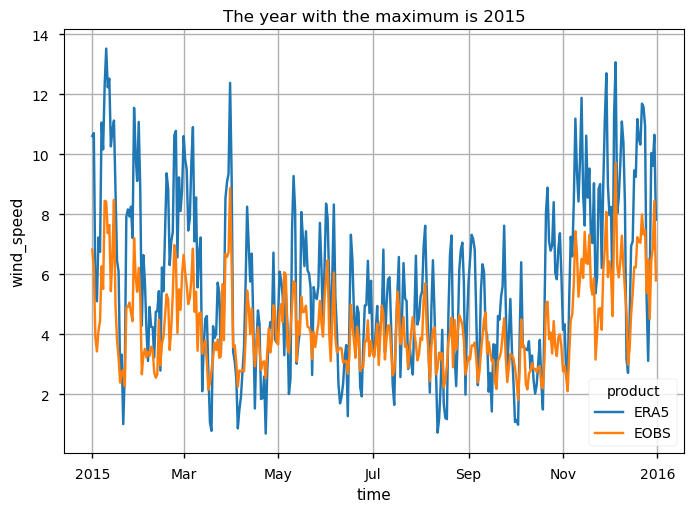

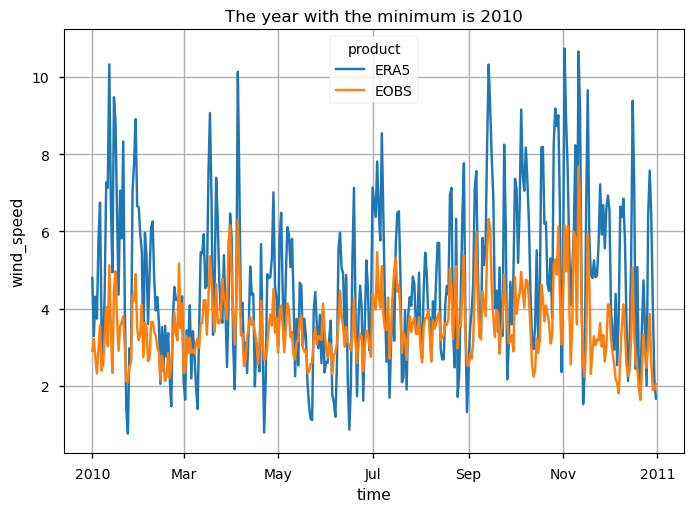

In [25]:
# Plot a comparison between the years with maximum and minimum annual WS
da_timeseries_yearly = da_timeseries.sel(product="EOBS").groupby("time.year").mean()
zooms = {
    "maximum": int(da_timeseries_yearly.idxmax("year").squeeze()),
    "minimum": int(da_timeseries_yearly.idxmin("year").squeeze()),
}
for label, year in zooms.items():
    da = da_timeseries.sel(time=str(year))
    da.plot(hue="product")
    plt.grid()
    plt.title(f"The year with the {label} is {year}")
    plt.show()

These time series plots show that both datasets have overall similar average variability but contrasting absolute WS range in terms of extreme values, with E-OBS showing very few cases of daily mean WS > 10 m/s. Furthermore, the same pattern is found when specific years of minimum and maximum mean values are analysed: 1987 is shown to have several days surpassing 8 m/s WS, whereas in 2010, many more days reached this value (in E-OBS). ERA5 shows average agreement, with much greater variability and more extreme maximum and minimum values.

(insitu_insitu-gridded-observations-europe_completeness_q05:code-section-2)= 
### 2. Analyse the annual climatology for alternative 30-year periods

(insitu_insitu-gridded-observations-europe_completeness_q05:code-section-2.1)= 
#### 2.1. Calculate and plot annual mean WS maps and PDFs


With the subsets per period already created, now it is time to calculate the climatological mean over each Time of Interest (ToI). Here, the calculation of the annual mean WS map for each day of the year (DOY) is done, while considering a 15-day Simple Moving Average (SMA), in order to smooth the inter-day variability.

To complement the statistics and the maps of the annual mean WS over the AoI, it is also useful to consider the full distribution of the values of this variable, which is a function of space and time. The PDF is useful to this effect, as it shows how frequent certain values are in a given period. To this effect, we will use the helper functions defined earlier to calculate the climatology and the probability density function. In the following plot, we compare the PDF across the two climatology periods to emphasise how these frequencies have been changing.

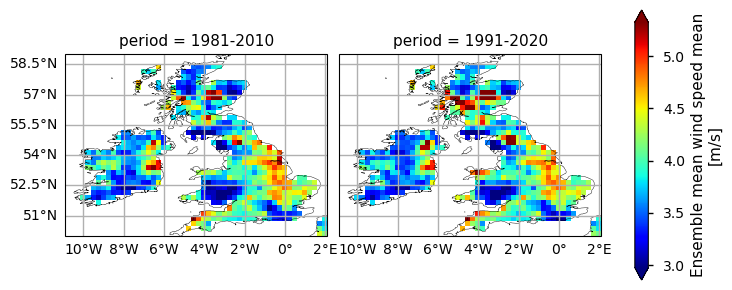

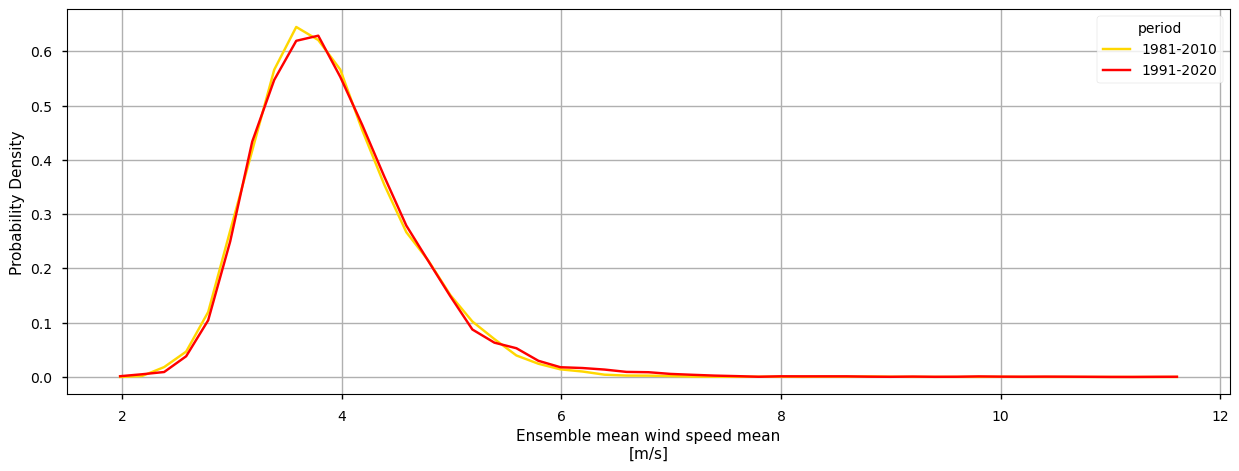

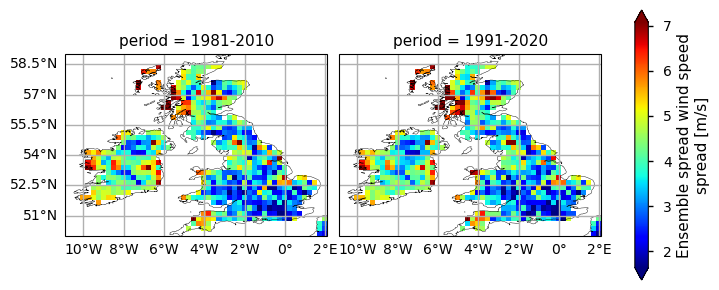

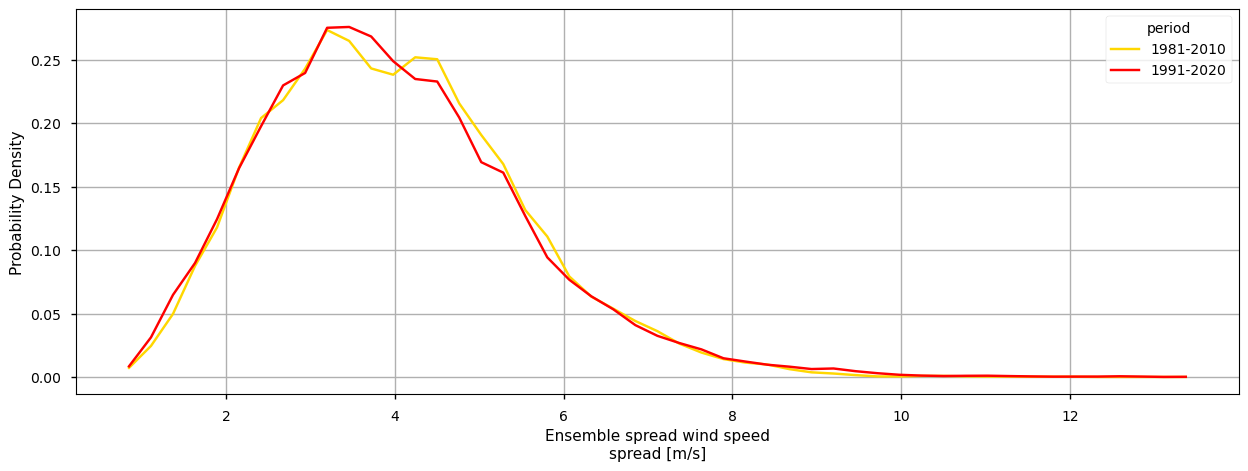

In [26]:
# Plot the PDF and climatology maps of RR
maps_kwargs = {"col": "period", "cmap": "jet", "robust": True}
pdf_kwargs = {"colors": colors, "hue": "period", "figsize": [15, 5]}
for da in ds_periods.data_vars.values():
    plot.projected_map(da.mean("dayofyear", keep_attrs=True), **maps_kwargs)
    plt.show()

    plot_pdf(da, **pdf_kwargs)
    plt.show()

(insitu_insitu-gridded-observations-europe_completeness_q05:code-section-2.2)= 
#### 2.2. Inspect the results

The WS climatology maps already disclose some spatial patterns of the annual statistics summarised before, for instance, the similarity between both climatologies. Only in Scotland and Ireland it is possible to observe differences between both climatologies, with a slight increase and decrease in WS, respectively.

In addition, the PDF plots for the ensemble mean and spread also show a maintenance of the distribution.

This agrees with the mean climatological values found before, with an overall maintenance of the mean climatology and an overall statistical distribution shift of the spread distribution.

(insitu_insitu-gridded-observations-europe_completeness_q05:code-section-3)=  
### 3. Analyse the seasonal climatology for alternative 30-year periods

(insitu_insitu-gridded-observations-europe_completeness_q05:code-section-3.1)=
#### 3.1. Calculate and plot seasonal mean WS maps and PDFs

To take the analysis further, it is also useful to proceed with the calculation of seasonal climatologies. In this case, the ToI will consider all the seasons of the year, i.e., Winter (December, January, and February - DJF), Spring (March, April, May - MAM), Summer (June, July, and August - JJA) and Autumn (September, October, November - SON). In both cases, we will plot their PDFs and maps for the two periods.

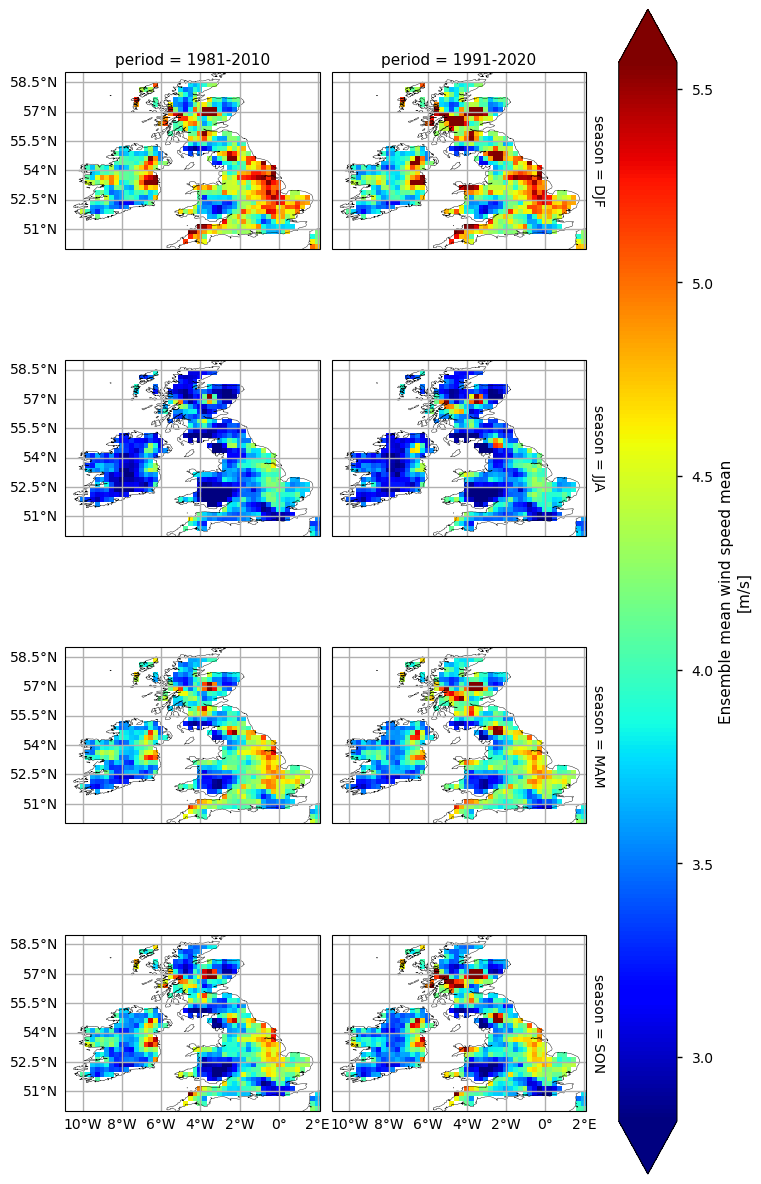

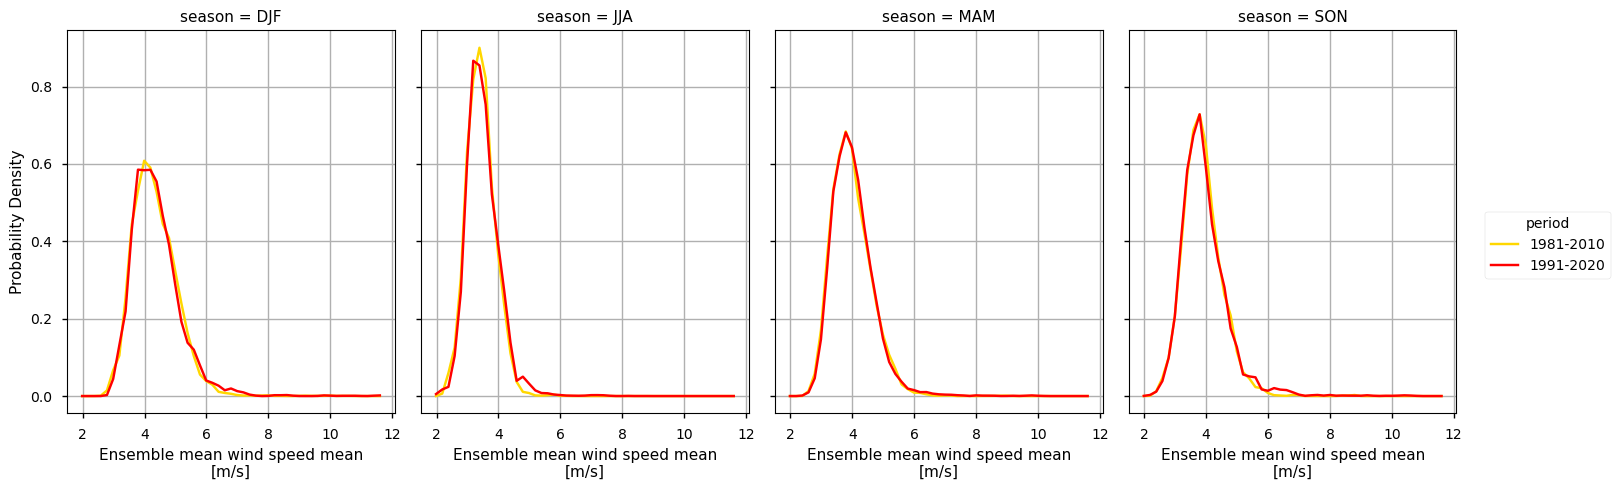

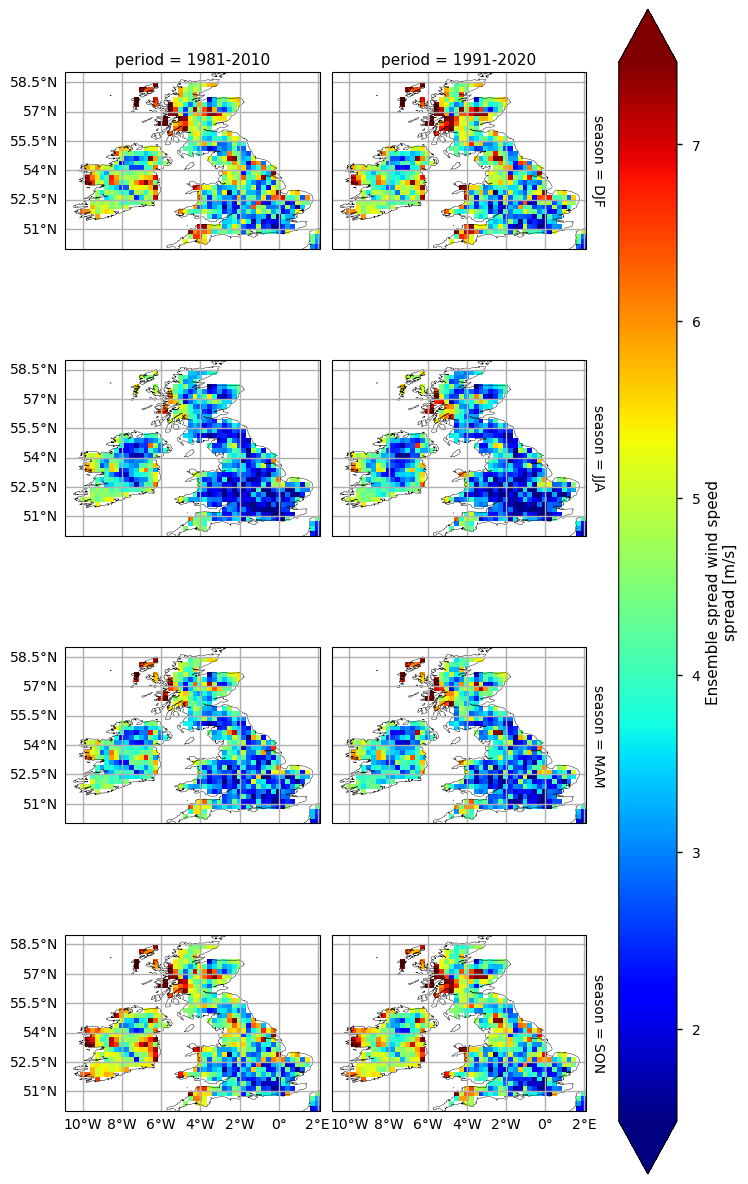

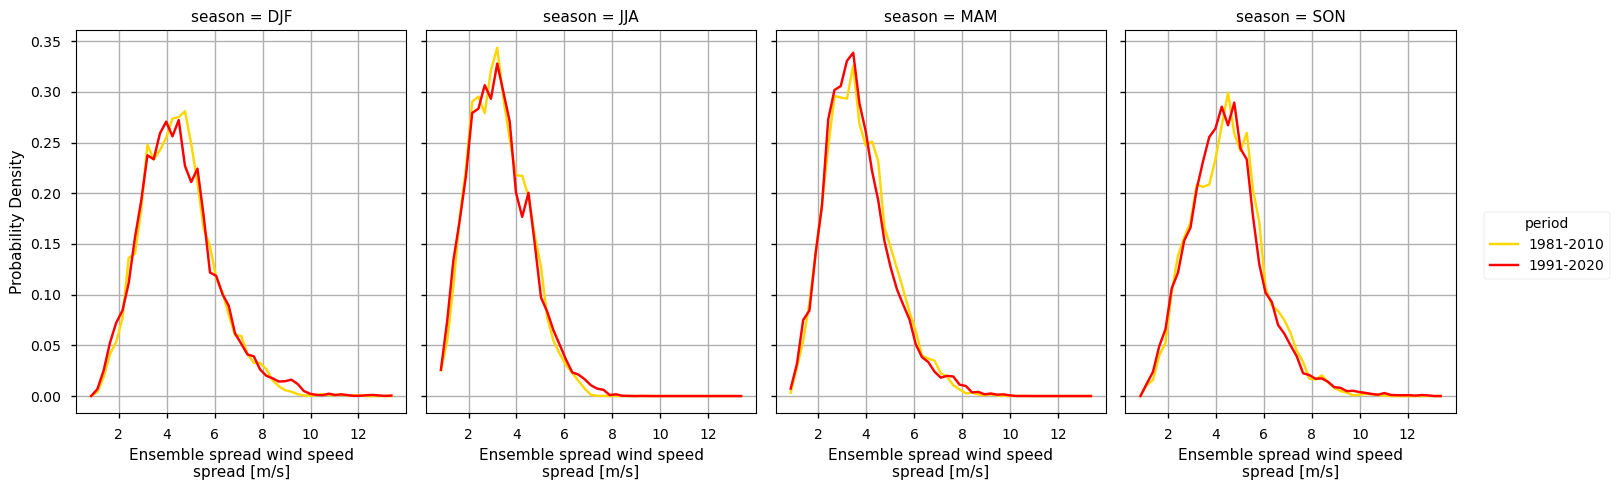

In [27]:
for da in ds_periods.data_vars.values():
    da_loaded = da.compute()
    plot.projected_map(
        da_loaded.groupby("season").mean(keep_attrs=True),
        row="season",
        **maps_kwargs,
    )
    plt.show()

    plot_pdf(da_loaded, col="season", **pdf_kwargs)
    plt.show()

(insitu_insitu-gridded-observations-europe_completeness_q05:code-section-3.2)=  
#### 3.2. Inspect the results

In the above plots, we can see dissimilar spatial patterns between seasonal changes: overall, the higher WS values are centred in the east coast of England and in the West coast of Scotland, surpassing 4.5 m/s, with maximum values surpassing 5.5 m/s during the Winter months, in both climatological periods. By contrast, the Summer has the lowest average WS values, often below 3.5 m/s. 

In contrast, the ensemble spread maps illustrate the confidence level and variability that these average values may represent - unlike the climatology mean, the WS spread has a weak seasonality component.

(insitu_insitu-gridded-observations-europe_completeness_q05:code-section-4)= 
### 4. Compare E-OBS with the in-situ WS at the station 035900-99999

(insitu_insitu-gridded-observations-europe_completeness_q05:code-section-4.1)= 
#### 4.1. Plot heatmap of the difference between E-OBS and in-situ WS and E-OBS and ERA5 WS 
First, let's compare E-OBS with in-situ and ERA5 WS at the station l035900-99999. For this, we are going to plot two heatmaps with the difference between E-OBS and in-situ and E-OBS and ERA5 WS values.

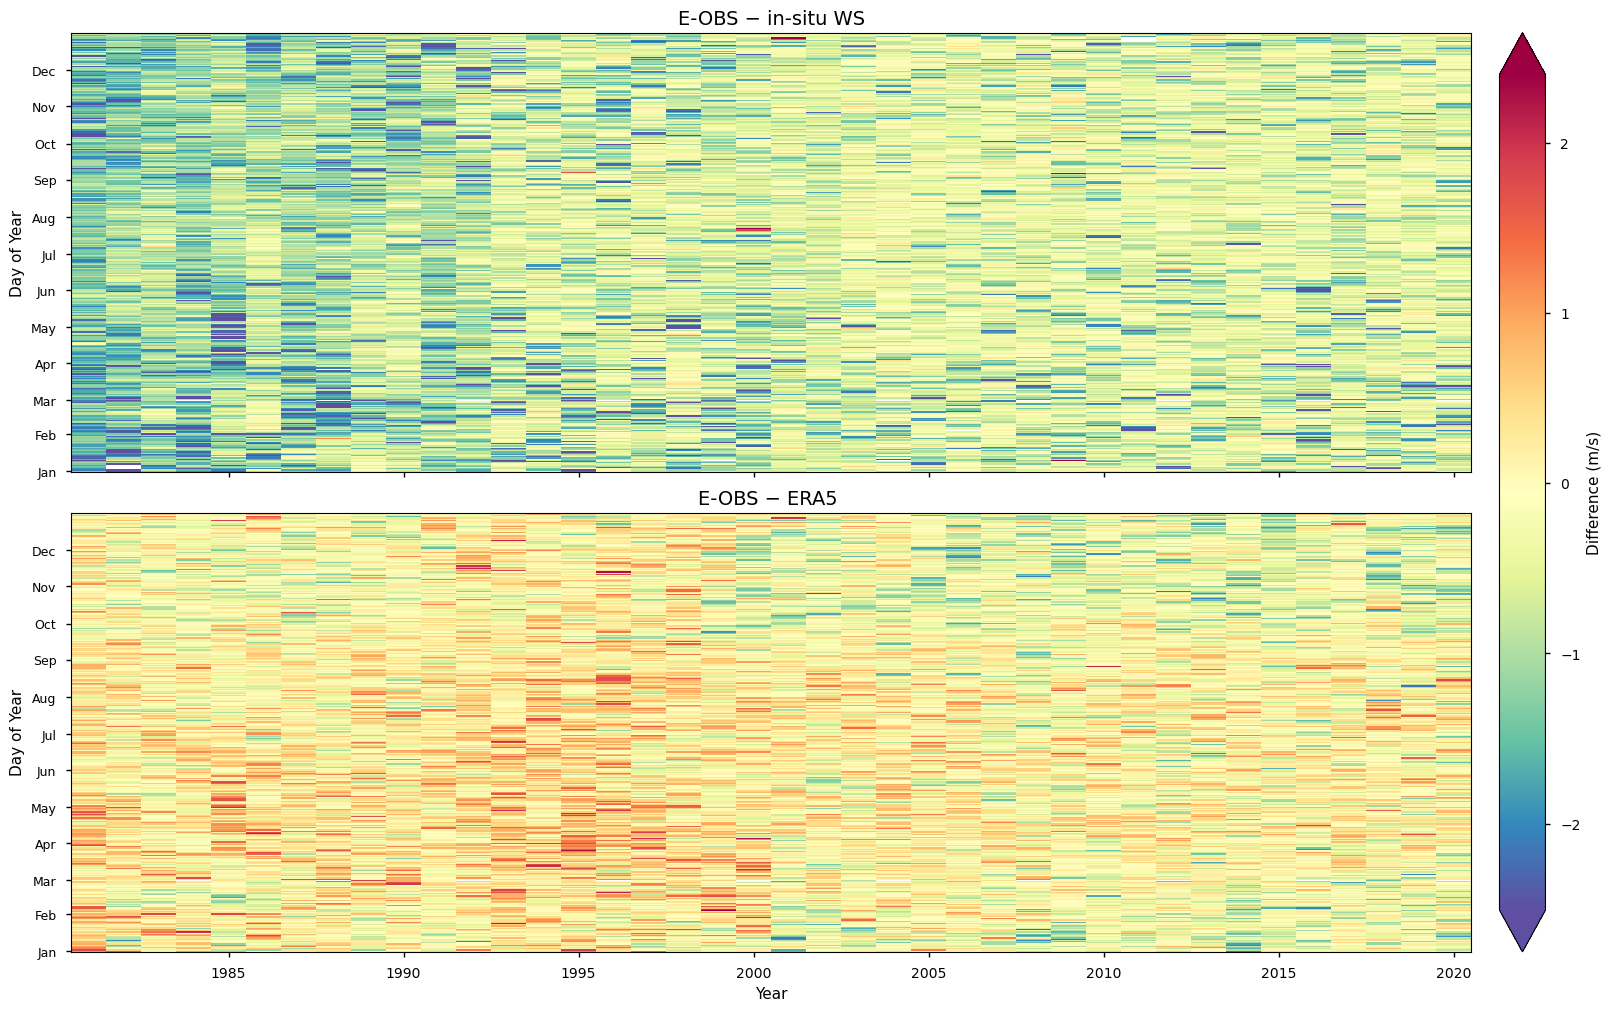

In [28]:
def compute_difference(ds_a, ds_b):
    # Compute difference
    diff = (ds_a - ds_b)

    # Add temporal coordinates
    ds_diff = diff.assign_coords({
        "year": diff.time.dt.year,
        "doy": diff.time.dt.dayofyear,
        "month": diff.time.dt.month,
        "day": diff.time.dt.day
    })

    # Remove Feb 29
    ds_diff = ds_diff.sel(time=~((ds_diff.time.dt.month == 2) & (ds_diff.time.dt.day == 29)))

    # Group and reshape: doy x year
    grid = ds_diff.groupby("year").apply(lambda x: x.groupby("doy").mean("time"))
    grid_2d = grid.transpose("doy", "year")
    
    # Prepare values
    X = grid_2d.year.values
    Y = grid_2d.doy.values
    Z = grid_2d.values

    return ds_diff, ds_diff, X, Y, Z

# compute differences using the helper function
ds_diff_eobs_insitu, ds_diff_eobs_insitu, X_eobs_insitu, Y_eobs_insitu, Z_eobs_insitu = compute_difference(da_timeseries_at_station.sel(product="EOBS"), da_timeseries_at_station.sel(product="in-situ"))
ds_diff_eobs_era5, ds_diff_eobs_era5, X_eobs_era5, Y_eobs_era5, Z_eobs_era5 = compute_difference(da_timeseries_at_station.sel(product="EOBS"), da_timeseries_at_station.sel(product="ERA5"))

# Plot

# Create the figure with 2 subplots (one for each pair of products)
fig, axes = plt.subplots(2, 1, figsize=(16, 10), sharex=True, constrained_layout=True)

# EOBS vs In-situ
im1 = axes[0].pcolormesh(
    X_eobs_insitu, Y_eobs_insitu, Z_eobs_insitu,
    cmap='Spectral_r', shading='nearest', vmin=-0.75, vmax=0.75
)
axes[0].set_title("E-OBS − in-situ WS", fontsize=14)
axes[0].set_ylabel("Day of Year")

# Y-axis (Month ticks based on DoY start)
month_starts = {
    1: 1, 2: 32, 3: 60, 4: 91, 5: 121, 6: 152,
    7: 182, 8: 213, 9: 244, 10: 274, 11: 305, 12: 335
}

axes[0].set_yticks(
    ticks=list(month_starts.values()),
    labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun",
            "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"],
    fontsize=9
)

# EOBS vs ERA5
im2 = axes[1].pcolormesh(
    X_eobs_era5, Y_eobs_era5, Z_eobs_era5,
    cmap='Spectral_r', shading='nearest'#, vmin=-0.75, vmax=0.75
)
axes[1].set_title("E-OBS − ERA5 ", fontsize=14)
axes[1].set_xlabel("Year")
axes[1].set_ylabel("Day of Year")

axes[1].set_yticks(
    ticks=list(month_starts.values()),
    labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun",
            "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"],
    fontsize=9
)

# Add one common colorbar for both subplots
cbar = fig.colorbar(im2, ax=axes, orientation='vertical', extend='both', label="Difference (m/s)", pad=0.02)

(insitu_insitu-gridded-observations-europe_completeness_q05:code-section-4.2)= 
#### 4.2 Inspect the results
E-OBS typically underestimates WS when compared with in-situ observations, with differences generally below 2 m/s. In contrast, E-OBS tends to overestimate WS relative to ERA5, particularly at the beginning of the study period, when discrepancies can exceed 2 m/s. However, these differences gradually decrease over time, stabilising between 0 and 1.5 m/s in the most recent years. Overall, the E-OBS WS values tend to converge towards both in-situ and ERA5 observations over time, especially during the summer months, in comparison with ERA5.

(insitu_insitu-gridded-observations-europe_completeness_q05:code-section-5)= 
### 5. Compare E-OBS and situ WS climatologies at the station 035900-99999

(insitu_insitu-gridded-observations-europe_completeness_q05:code-section-5.1)= 
#### 5.1 Calculate and plot climatologies

We are going to compare the climatologies for the in-situ station location for E-OBS, ERA5 and in-situ WS. For this, we need to first compute the climatologies for each dataset.

In [ ]:
# Select data from 1990 to 2021
data = da_timeseries_at_station.sel(time=slice('1990-12-25', '2021-01-07'))

# Create a new variable with month and day
data['month_day'] = data['time'].dt.strftime("%m-%d")

# Remove '02-29' from the data
data_subset = data.where(data['month_day'] != '02-29', drop=True)

# Subset the data to 1991-2020
data_subset = data_subset.sel(time=slice('1991-01-01', '2020-12-31'))

# Grouby month_day and calculate the mean for each group
climatology = data_subset.groupby('month_day').mean('time')

# Smooth the climatology computing an average moving window (15-day window), for the first 7 times the mean is computed using the last and 7 times, for the last 7 times the mean is computed using the first 7 times
window_size = 15
half_window = window_size // 2

# Extend the DataArray at both ends by mirroring
climatology_extended = xr.concat([climatology.isel(month_day=slice(-half_window, None)), climatology, climatology.isel(month_day=slice(-half_window, None))], dim="month_day")
# Compute averaged moving window
climatology_smoothed = climatology_extended.rolling(month_day=15, min_periods = 15, center=True).mean()
climatology_smoothed = climatology_smoothed.isel(month_day=slice(half_window, -half_window))

In [30]:
# Inspect the dataset
climatology_smoothed

<xarray.DataArray 'windspeeds' (product: 3, month_day: 365)> Size: 9kB
dask.array<getitem, shape=(3, 365), dtype=float64, chunksize=(1, 15), chunktype=numpy.ndarray>
Coordinates:
  * product      (product) object 24B 'in-situ' 'EOBS' 'ERA5'
  * month_day    (month_day) object 3kB '01-01' '01-02' ... '12-30' '12-31'
    longitude    float64 8B 0.975
    latitude     float64 8B 52.12
    elevation    float64 8B dask.array<chunksize=(), meta=np.ndarray>
    realization  int64 8B 0
    surface      float64 8B 0.0
Attributes:
    long_name:      Wind speed at mast height (~10m)
    units:          meters per second
    flagged_value:  -2e+30
    valid_min:      0.0
    valid_max:      31.4
    standard_name:  wind_speed
    cell_methods:   latitude: longitude: time: point (nearest to reporting hour)

In [31]:
# Choose color for each product plot
colors = {
    "in-situ": "#F5B026",
    "E-OBS": "#007E99",
    "ERA5": "#6A4A3C",
}

# Get datasets
climatology_eobs = climatology_smoothed.sel(product="EOBS")
climatology_era_5 = climatology_smoothed.sel(product="ERA5")
climatology_in_situ = climatology_smoothed.sel(product="in-situ")

climatology_datasets = {
    "in-situ": climatology_in_situ,
    "E-OBS": climatology_eobs,
    "ERA5": climatology_era_5,
}

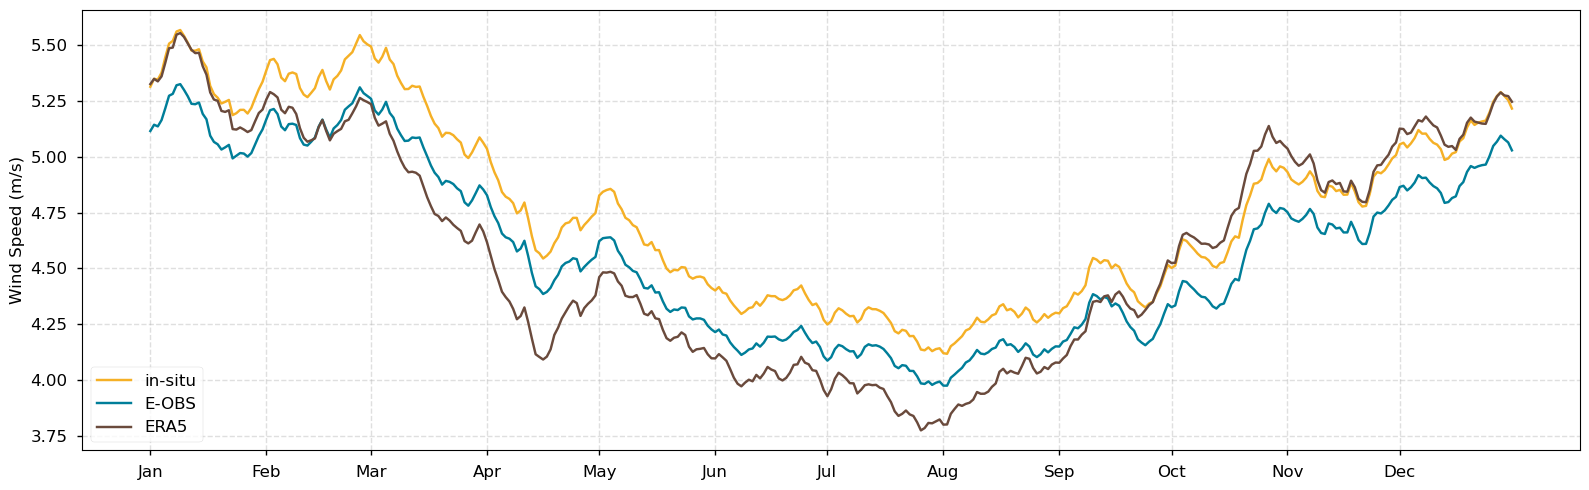

In [32]:
# Plot 
fig, ax = plt.subplots(figsize=(16, 5))
for name, data in climatology_datasets.items():

    ax.plot(
    data.month_day,
    data,
    label= name,
    color = colors[name], 
)

# Define month starts
month_starts = ["01-01", "02-01", "03-01", "04-01", "05-01", "06-01",
                "07-01", "08-01", "09-01", "10-01", "11-01", "12-01"]

# Find indices of those month starts
tick_positions = [i for i, m in enumerate(data.month_day.values) if m in month_starts]
tick_labels = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
               "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# Apply ticks by index
plt.xticks(tick_positions, tick_labels, fontsize=12)


plt.ylabel("Wind Speed (m/s)", fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

(insitu_insitu-gridded-observations-europe_completeness_q05:code-section-5.2)= 
#### 5.2 Inspect the results
All three climatologies are very similar, with differences of less than 0.5 m/s. From January to October, the in-situ climatology is generally higher than the other two. After October, the ERA5 climatology becomes the highest, despite being lower than the others for most of the year. The E-OBS climatology is consistently the lowest from October to February and lies between the in-situ and ERA5 climatologies during the rest of the year.

(insitu_insitu-gridded-observations-europe_completeness_q05:code-section-6)= 
### 6. Compare E-OBS, ERA5 and in-situ WS PDFs at the station 035900-99999

(insitu_insitu-gridded-observations-europe_completeness_q05:code-section-6.1)= 
#### 6.1 Create and plot PDFs

Finally, let's compare the PDFs of E-OBS, in-situ and ERA5 at the station location.

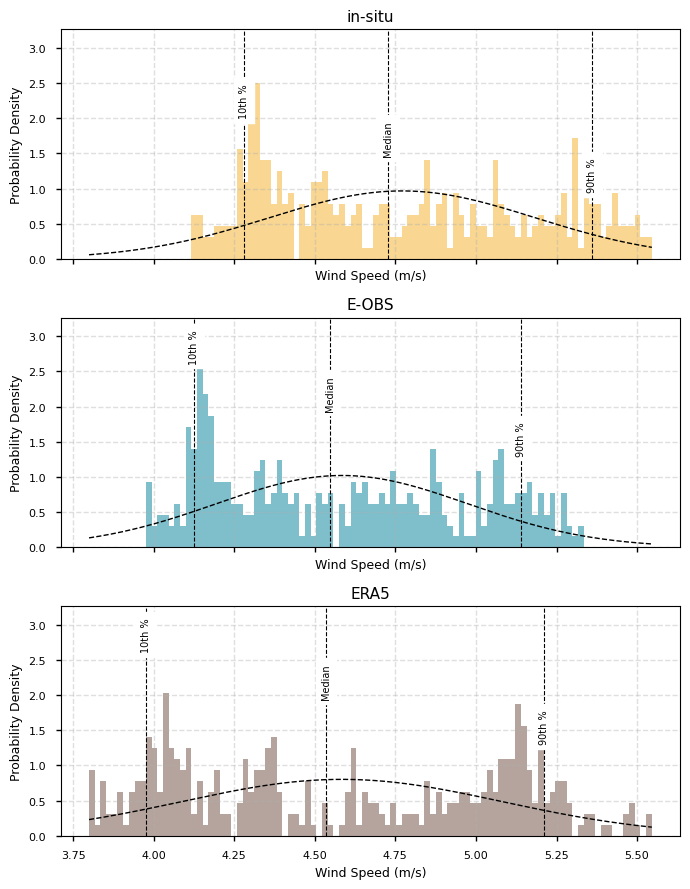

In [33]:


# Define consistent bins across all
bins = np.linspace(
    min(np.percentile(climatology_in_situ, 0.5), np.percentile(climatology_eobs, 0.5), np.percentile(climatology_era_5, 0.5)),
    max(np.percentile(climatology_in_situ, 99.5), np.percentile(climatology_eobs, 99.5), np.percentile(climatology_era_5, 99.5)),
    100
)

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(7, 9), sharex=True, sharey=True)

for ax, (name, data) in zip(axes.flatten(), climatology_datasets.items()):
    mu, std = np.mean(data), np.std(data)

    # Histogram
    ax.hist(data, bins=bins, density=True, alpha=0.5, color=colors[name], linewidth=0.8, label=f"{name} data")

    # Normal fit
    x_vals = np.linspace(bins[0], bins[-1], 500)
    ax.plot(x_vals, norm.pdf(x_vals, mu, std), color="black", linestyle="--", linewidth=1.0, label="Normal fit")

    # Annotated percentiles
    for val, label, ypos in zip(
        [np.percentile(data, 10), np.median(data), np.percentile(data, 90)],
        ["10th %", "Median", "90th %"],
        [0.95, 0.75, 0.55],
    ):
        ax.axvline(val, color="black", linestyle="--", linewidth=0.8)
        ax.text(val, ax.get_ylim()[1] * ypos, label, rotation=90, fontsize=7,
                ha='center', va='top', backgroundcolor='white')

    # Labels and styling
    ax.set_title(name, fontsize=11,)
    ax.grid(True, linestyle="--", alpha=0.4)
    ax.tick_params(labelsize=8)

    ax.set_xlabel("Wind Speed (m/s)", fontsize=9)
    ax.set_ylabel("Probability Density", fontsize=9)


plt.tight_layout()
plt.show()

(insitu_insitu-gridded-observations-europe_completeness_q05:code-section-6.2)= 
#### 6.2 Inspect the results
Overall, all three datasets display similar WS distribution shapes, centred around 4.5–4.75 m/s, especially E-OBS and in-situ. However, some differences emerge in their extremes and spread. Relatively to in-situ WS, E-OBS distribution is skewed to the left, meaning it tends to underestimate the WS values. The ERA5 distribution is flatter than the other two, yielding higher probabilities for both extremely low and high WS. It captures the most intense WS like the in-situ dataset, although with less probability, but largely underestimates the lowest WS values.

(insitu_insitu-gridded-observations-europe_completeness_q05:code-section-7)= 
### 7. Main takeaways

- E-OBS and ERA5 display similar average variability, but E-OBS underrepresents extreme wind speeds. Daily mean values >10 m/s are rare in E-OBS, while ERA5 shows a wider range and more intense events.

- The comparison between the 1981–2010 and 1991–2020 climatologies shows high consistency in mean wind speed across Europe, with only minor differences. The spatial patterns remain largely unchanged, except for small regional variations in Scotland and Ireland.

- Winter consistently shows the highest wind speeds (>4.5–5.5 m/s), while summer presents the lowest (<3.5 m/s). Ensemble spread (uncertainty) has weak seasonality, indicating stable confidence levels throughout the year.

- There is a general agreement between E-OBS, ERA5, and in-situ WS values and climatologies at the station 035900-99999. However, PDFs show consistent distribution shapes but reveal that E-OBS is slightly left-skewed relative to in-situ, while ERA5 spreads more into both extremes.



## ℹ️ If you want to know more

### Key resources

Some key resources and further reading were linked throughout this assessment.

The CDS catalogue entry for the data used were:
* E-OBS daily gridded meteorological data for Europe from 1950 to present derived from in-situ observations:
    https://cds.climate.copernicus.eu/datasets/insitu-gridded-observations-europe?tab=overview

* ERA5 hourly data on pressure levels from 1940 to present:
    https://cds.climate.copernicus.eu/datasets/reanalysis-era5-pressure-levels?tab=overview 

Code libraries used:
* [C3S EQC custom functions](https://github.com/bopen/c3s-eqc-automatic-quality-control/tree/main/c3s_eqc_automatic_quality_control), `c3s_eqc_automatic_quality_control`,  prepared by [B-Open](https://www.bopen.eu/)

### References

[[1]](https://climate.copernicus.eu/esotc/2023) Copernicus Climate Change Service. 2024. European State of the Climate 2023.

[[2]](https://climate-adapt.eea.europa.eu/en/knowledge/european-climate-data-explorer) Climate ADAPT.

[[3]](https://library.wmo.int/index.php?lvl=notice_display&id=20130) World Meteorological Organization (WMO) Guidelines on the Calculation of Climate Normals:

[[4]](https://doi.org/10.1029/2017JD028200) Cornes, R., G. van der Schrier, E.J.M. van den Besselaar, and P.D. Jones. 2018: An Ensemble Version of the E-OBS Temperature and Precipitation Datasets, J. Geophys. Res. (Atmospheres), 123.

[[5]](https://doi.org/10.1002/JOC.7269) Bandhauer, Moritz, Francesco Isotta, Mónika Lakatos, Cristian Lussana, Line Båserud, Beatrix Izsák, Olivér Szentes, Ole Einar Tveito, and Christoph Frei. 2022. “Evaluation of Daily Precipitation Analyses in E-OBS (V19.0e) and ERA5 by Comparison to Regional High-Resolution Datasets in European Regions.” International Journal of Climatology 42 (2): 727–47.

[[6]](https://doi.org/10.1029/2009JD011799) Hofstra, Nynke, Malcolm Haylock, Mark New, and Phil D. Jones. 2009. “Testing E-OBS European High-Resolution Gridded Data Set of Daily Precipitation and Surface Temperature.” Journal of Geophysical Research Atmospheres. 

[[7]](https://doi.org/10.1029/2020EA001633) Rivoire, Pauline, Olivia Martius, and Philippe Naveau. 2021. “A Comparison of Moderate and Extreme ERA-5 Daily Precipitation With Two Observational Data Sets.” Earth and Space Science 8 (4): e2020EA001633.

[[8]](https://doi.org/10.1002/joc.8191) de Baar, Jouke H. S., van der Schrier, Gerard, van den Besselaar, Else J. M., Garcia-Marti, Irene, de Valk, Cees. 2023. “A new E-OBS gridded dataset for daily mean wind speed over Europe.” International Journal of Climatology 43 (13): 6083-6100.

[[9]](https://doi.org/10.5194/asr-20-91-2023) de Baar, Jouke H. S., Nhat Luu, van der Schrier, Gerard, van den Besselaar, Else J. M., Garcia-Marti, Irene. 2023. “Recent improvements in the E-OBS gridded data set for daily mean wind speed over Europe in the period 1980–2021.” Advances in Science and Research 20: 91-95.